# Imports

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Loading the Data

## Markdown Cells

In [3]:
md_filepath = 'markdown_group.csv'
md_df = pd.read_csv(md_filepath)

In [4]:
# initial look at the data
md_df.head()

,Unnamed: 0,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,...,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,3,594,True,False,False,False,0.507588,0.044444,3.0,0.0,...,True,False,0.068182,True,1.0,True,0.000000,1.000000,1.809524,False
1,6,1222,True,False,False,False,1.000000,0.161290,1.0,0.0,...,True,True,0.333333,False,2.0,True,0.961538,1.000000,0.000000,False
2,7,1447,True,False,False,False,0.970851,0.375887,1.0,0.0,...,True,True,0.621429,True,1.0,True,0.988636,1.000000,0.000000,False
3,12,2705,True,False,False,False,1.000000,0.461538,1.0,0.0,...,True,True,0.640000,True,1.0,False,0.000000,0.923077,1.615385,False
4,15,2861,True,False,False,True,1.000000,0.461538,1.0,0.0,...,False,True,0.520000,False,1.0,False,0.000000,1.000000,6.333333,False


In [5]:
# save the original dataframe
md_original = md_df.copy()

In [6]:
# clear the first two columns
md_df = md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [7]:
# check the data again
md_df.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,True,False,False,False,0.507588,0.044444,3.0,0.0,True,True,False,0.068182,True,1.0,True,0.000000,1.000000,1.809524,False
1,True,False,False,False,1.000000,0.161290,1.0,0.0,True,True,True,0.333333,False,2.0,True,0.961538,1.000000,0.000000,False
2,True,False,False,False,0.970851,0.375887,1.0,0.0,True,True,True,0.621429,True,1.0,True,0.988636,1.000000,0.000000,False
3,True,False,False,False,1.000000,0.461538,1.0,0.0,True,True,True,0.640000,True,1.0,False,0.000000,0.923077,1.615385,False
4,True,False,False,True,1.000000,0.461538,1.0,0.0,False,False,True,0.520000,False,1.0,False,0.000000,1.000000,6.333333,False


In [8]:
# extract the column titles
md_vars = list(md_df)
md_vars

['longer_beginning',
 'longer_ending',
 'has_author',
 'has_equation',
 'jupyter_prop',
 'markdown_prop',
 'num_contrib',
 'image_prop',
 'is_education',
 'has_links',
 'has_comments',
 'md_frequency',
 'has_title',
 'num_commits',
 'md_format',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'has_error']

## No Markdown Cells

In [9]:
no_md_filepath = 'no_markdown_group.csv'
no_md_df = pd.read_csv(no_md_filepath)

In [10]:
# save the original dataframe
no_md_original = no_md_df.copy()

In [11]:
# clear the first two columns
no_md_df = no_md_df.drop(['Unnamed: 0', 'nb_id'], axis = 1)

In [12]:
# initial look at the data
no_md_df.head()

,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,False,0.714130,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False
1,False,0.997840,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True
2,False,0.121957,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False
3,False,1.000000,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False
4,False,0.940063,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True


In [13]:
# extract the column titles
no_md_vars = list(no_md_df)
no_md_vars

['has_author',
 'jupyter_prop',
 'num_contrib',
 'image_prop',
 'is_education',
 'has_comments',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'has_error']

# K-Means Clustering

## Adjust the Data

Since k-means clustering is performed on quantitative variables, we change `True` and `False` in the data to `1` and `0`, respectively

In [14]:
# replace True with 1 in both groups
md_adjusted = md_df.replace(True, 1)
no_md_adjusted = no_md_df.replace(True, 1)

In [15]:
# replace False with 0 in both groups
md_adjusted = md_adjusted.replace(False, 0)
no_md_adjusted = no_md_adjusted.replace(False, 0)

In [16]:
# check the markdown cell group
md_adjusted.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,1.0,0.0,0.0,0.0,0.507588,0.044444,3.0,0.0,1.0,1.0,0.0,0.068182,1.0,1.0,1.0,0.000000,1.000000,1.809524,0.0
1,1.0,0.0,0.0,0.0,1.000000,0.161290,1.0,0.0,1.0,1.0,1.0,0.333333,0.0,2.0,1.0,0.961538,1.000000,0.000000,0.0
2,1.0,0.0,0.0,0.0,0.970851,0.375887,1.0,0.0,1.0,1.0,1.0,0.621429,1.0,1.0,1.0,0.988636,1.000000,0.000000,0.0
3,1.0,0.0,0.0,0.0,1.000000,0.461538,1.0,0.0,1.0,1.0,1.0,0.640000,1.0,1.0,0.0,0.000000,0.923077,1.615385,0.0
4,1.0,0.0,0.0,1.0,1.000000,0.461538,1.0,0.0,0.0,0.0,1.0,0.520000,0.0,1.0,0.0,0.000000,1.000000,6.333333,0.0


In [17]:
# check the no markdown cell group
no_md_adjusted.head()

,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,0.0,0.714130,1.0,0.142857,0.0,0.0,1.0,0.00000,1.000000,1.000000,0.0
1,0.0,0.997840,1.0,0.187500,0.0,1.0,1.0,0.04878,0.789474,10.631579,1.0
2,0.0,0.121957,5.0,0.000000,0.0,1.0,11.0,0.00000,0.909091,6.181818,0.0
3,0.0,1.000000,1.0,0.000000,0.0,1.0,1.0,0.00000,1.000000,1.631579,0.0
4,0.0,0.940063,3.0,0.000000,0.0,1.0,3.0,0.12500,1.000000,1.000000,1.0


## Markdown Cells

### Standardizing the Data

In [18]:
# normalize all variables
md_stand = md_df.loc[:, md_vars].values
md_stand = StandardScaler().fit_transform(md_stand)

In [19]:
# check that the normalized data has a mean of zero and std of one
print(np.mean(md_stand), np.std(md_stand))

7.602639141268273e-17 1.0


In [20]:
# put the normalized data back into dataframe format
md_stand_df = pd.DataFrame(md_stand, columns = md_vars)

# initial look at the standardized data
md_stand_df.head()

,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,0.915797,-0.590961,-0.221343,-0.490296,-1.293088,-1.942050,0.504838,-0.960204,0.856909,1.280391,-2.838192,-1.964232,0.741665,-0.399981,1.082388,-0.410421,0.690767,-0.337021,-0.393367
1,0.915797,-0.590961,-0.221343,-0.490296,0.570932,-1.286070,-0.201473,-0.960204,0.856909,1.280391,0.352337,-0.934795,-1.348317,-0.056390,1.082388,3.185141,0.690767,-0.487356,-0.393367
2,0.915797,-0.590961,-0.221343,-0.490296,0.460589,-0.081313,-0.201473,-0.960204,0.856909,1.280391,0.352337,0.183720,0.741665,-0.399981,1.082388,3.286470,0.690767,-0.487356,-0.393367
3,0.915797,-0.590961,-0.221343,-0.490296,0.570932,0.399542,-0.201473,-0.960204,0.856909,1.280391,0.352337,0.255823,0.741665,-0.399981,-0.923883,-0.410421,0.003778,-0.353150,-0.393367
4,0.915797,-0.590961,-0.221343,2.039586,0.570932,0.399542,-0.201473,-0.960204,-1.166986,-0.781011,0.352337,-0.210071,-1.348317,-0.399981,-0.923883,-0.410421,0.690767,0.038819,-0.393367


### Performing K-Means Clustering

In [21]:
# perform k-means with multiple k to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(md_stand)
    sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph for Optimal k for Markdown Cell Group')

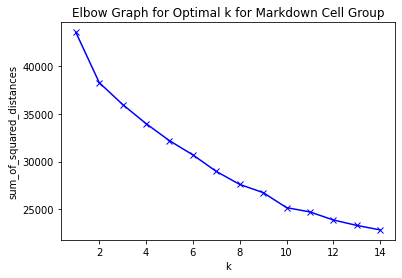

In [22]:
# plot the elbow graph
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Graph for Optimal k for Markdown Cell Group')

## No Markdown Cells

### Standardizing the Data

In [23]:
# normalize all variables
no_md_stand = no_md_df.loc[:, no_md_vars].values
no_md_stand = StandardScaler().fit_transform(no_md_stand)

In [24]:
# check that the normalized data has a mean of zero and a std of one
print(np.mean(no_md_stand), np.std(no_md_stand))

-3.909057653963651e-17 1.0


In [25]:
# put the normalized features back into dataframe format
no_md_stand_df = pd.DataFrame(no_md_stand, columns = no_md_vars)

# initial look at the standardized data
no_md_stand_df.head()

,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,-0.094526,-0.686940,-0.256338,-0.263196,-0.347507,-1.451826,-0.336957,-0.425060,0.525160,-0.371956,-0.435477
1,-0.094526,0.546025,-0.256338,-0.131354,-0.347507,0.688788,-0.336957,-0.233710,-0.681648,0.365723,2.296334
2,-0.094526,-3.260437,1.489081,-0.685091,-0.347507,0.688788,6.280101,-0.425060,0.004038,0.024918,-0.435477
3,-0.094526,0.555410,-0.256338,-0.685091,-0.347507,0.688788,-0.336957,-0.425060,0.525160,-0.323583,-0.435477
4,-0.094526,0.294933,0.616371,-0.685091,-0.347507,0.688788,0.986454,0.065274,0.525160,-0.371956,2.296334


### Performing K-Means Clustering

In [26]:
# we perform k-means with multiple k to find the optimal number of clusters
sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(no_md_stand)
    sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph for Optimal k for No Markdown Cell Group')

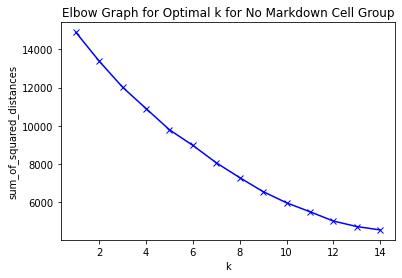

In [27]:
# plot the elbow graph
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Graph for Optimal k for No Markdown Cell Group')

# K-Prototypes Clustering

## Markdown Cells

In [28]:
# check the datatypes so we know the categorical indexes
list(enumerate(zip(list(md_df), md_df.dtypes)))

[(0, ('longer_beginning', dtype('bool'))),
 (1, ('longer_ending', dtype('bool'))),
 (2, ('has_author', dtype('bool'))),
 (3, ('has_equation', dtype('bool'))),
 (4, ('jupyter_prop', dtype('float64'))),
 (5, ('markdown_prop', dtype('float64'))),
 (6, ('num_contrib', dtype('float64'))),
 (7, ('image_prop', dtype('float64'))),
 (8, ('is_education', dtype('bool'))),
 (9, ('has_links', dtype('bool'))),
 (10, ('has_comments', dtype('bool'))),
 (11, ('md_frequency', dtype('float64'))),
 (12, ('has_title', dtype('bool'))),
 (13, ('num_commits', dtype('float64'))),
 (14, ('md_format', dtype('bool'))),
 (15, ('non_exec_prop', dtype('float64'))),
 (16, ('exec_inorder', dtype('float64'))),
 (17, ('exec_skips', dtype('float64'))),
 (18, ('has_error', dtype('bool')))]

In [29]:
# perform k-prototypes clustering with multiple k to find the optimal number of clusters
costs_md = []
K = range(1, 5)
for k in K:
    print("clustering with " + str(k) + " clusters")
    kproto = KPrototypes(n_clusters = k, init = 'Cao', verbose = 0)
    clusters = kproto.fit_predict(md_df, categorical = [0, 1, 2, 3, 8, 9, 10, 12, 14, 18])
    costs_md.append(kproto.cost_)

clustering with 1 clusters
clustering with 2 clusters
clustering with 3 clusters
clustering with 4 clusters


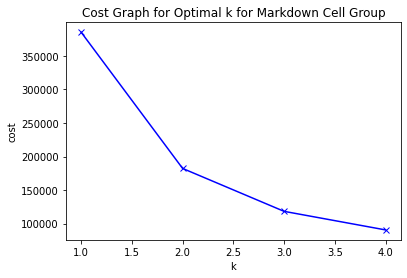

In [30]:
# plot the graph to determine the optimal number of clusters
plt.plot(K, costs_md, 'bx-')
plt.xlabel('k')
plt.ylabel('cost')
plt.title('Cost Graph for Optimal k for Markdown Cell Group')
plt.savefig('figures/4-md-kproto.png')

In [31]:
print(costs_md)

[385204.18526386685, 182240.04344039742, 118312.59458522317, 90640.33619310692]


The code took a very long time to run on just `[1, 2, 3, 4]` clusters, so we will do more on the remote server.

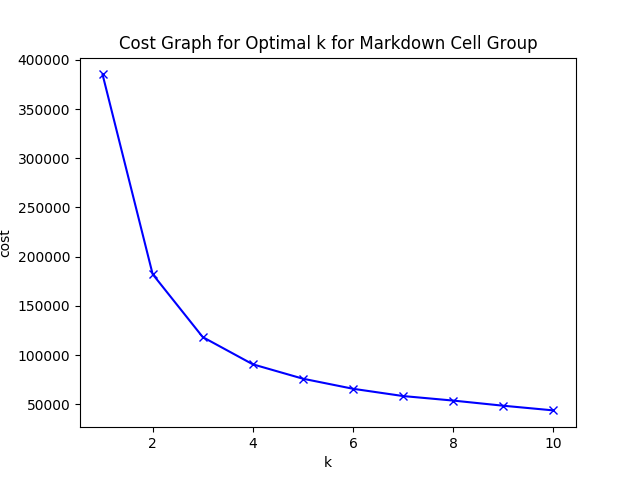

In [32]:
Image('figures/10-markdown-kproto.png')

## No Markdown Cells

In [33]:
# check datatypes
list(enumerate(no_md_df.dtypes))

[(0, dtype('bool')),
 (1, dtype('float64')),
 (2, dtype('float64')),
 (3, dtype('float64')),
 (4, dtype('bool')),
 (5, dtype('bool')),
 (6, dtype('float64')),
 (7, dtype('float64')),
 (8, dtype('float64')),
 (9, dtype('float64')),
 (10, dtype('bool'))]

In [34]:
# perform k-prototypes clustering with multiple k to find the optimal number of clusters
costs_no_md = []
K = range(1, 5)
for k in K:
    print("clustering with " + str(k) + " clusters")
    kproto = KPrototypes(n_clusters = k, init = 'Cao', verbose = 0)
    clusters = kproto.fit_predict(no_md_df, categorical = [0, 4, 5, 10])
    costs_no_md.append(kproto.cost_)

clustering with 1 clusters
clustering with 2 clusters
clustering with 3 clusters
clustering with 4 clusters


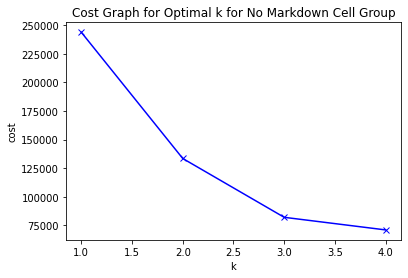

In [35]:
# plot the graph to determine the optimal number of clusters
plt.plot(K, costs_no_md, 'bx-')
plt.xlabel('k')
plt.ylabel('cost')
plt.title('Cost Graph for Optimal k for No Markdown Cell Group')
plt.savefig('figures/4-no-md-kproto.png')

In [36]:
print(costs_no_md)

[243733.80215925732, 133482.59109233855, 82105.75379667532, 71097.51113267324]


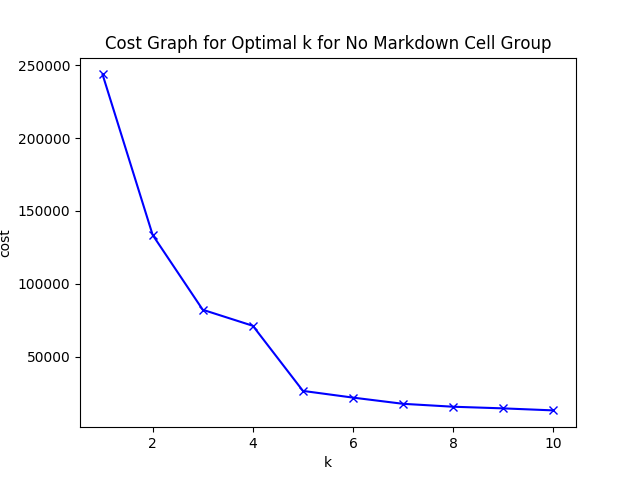

In [37]:
Image('figures/10-no-markdown-kproto.png')

# Extracting Clusters 

## Centroids

### Markdown Cells

In [38]:
# run the kproto algorithm on the optimal number of clusters
md_kproto = KPrototypes(n_clusters = 4, init = 'Cao', verbose = 0)
md_clusters = md_kproto.fit_predict(md_df, categorical = [0, 1, 2, 3, 8, 9, 10, 12, 14, 18])

In [39]:
# get the cluster centroids
md_cluster_centroids = md_kproto.cluster_centroids_
print(md_cluster_centroids)

[array([[7.77352673e-01, 3.47192173e-01, 7.85714286e-01, 5.32858560e-01,
        5.74201253e-01, 1.78571429e+00, 3.78722329e-02, 7.09818511e-01,
        1.06473607e+02],
       [8.52051222e-01, 3.99229505e-01, 1.65401540e+00, 2.75839425e-01,
        5.87105868e-01, 2.10396040e+00, 1.28159139e-01, 9.51070297e-01,
        1.93094173e+00],
       [8.49528957e-01, 3.05593794e-01, 1.59405941e+00, 3.79478882e-01,
        4.51001238e-01, 3.07920792e+00, 4.29893860e-02, 7.55205682e-01,
        3.85268836e+01],
       [8.37303179e-01, 3.70987665e-01, 1.17039106e+00, 3.21604823e-01,
        5.42829180e-01, 2.22625698e+00, 3.79499596e-02, 8.33913537e-01,
        1.27008484e+01]]), array([[False, False, False, False, False, False,  True,  True, False,
        False],
       [ True, False, False, False,  True, False,  True,  True, False,
        False],
       [False, False, False, False,  True, False,  True,  True, False,
        False],
       [False, False, False, False,  True, False,  True,  Tr

For the four clusters, the data is separated into quantitative and categorical, so we will organize it as such

In [40]:
# extract arrays for quantitative and categorical
md_quant_centroids = md_cluster_centroids[0]
md_cat_centroids = md_cluster_centroids[1]

In [41]:
# look at the variables so we can separate into quantitative and categorical
list(enumerate(zip(md_vars, md_df.dtypes)))

[(0, ('longer_beginning', dtype('bool'))),
 (1, ('longer_ending', dtype('bool'))),
 (2, ('has_author', dtype('bool'))),
 (3, ('has_equation', dtype('bool'))),
 (4, ('jupyter_prop', dtype('float64'))),
 (5, ('markdown_prop', dtype('float64'))),
 (6, ('num_contrib', dtype('float64'))),
 (7, ('image_prop', dtype('float64'))),
 (8, ('is_education', dtype('bool'))),
 (9, ('has_links', dtype('bool'))),
 (10, ('has_comments', dtype('bool'))),
 (11, ('md_frequency', dtype('float64'))),
 (12, ('has_title', dtype('bool'))),
 (13, ('num_commits', dtype('float64'))),
 (14, ('md_format', dtype('bool'))),
 (15, ('non_exec_prop', dtype('float64'))),
 (16, ('exec_inorder', dtype('float64'))),
 (17, ('exec_skips', dtype('float64'))),
 (18, ('has_error', dtype('bool')))]

In [42]:
# extract quant and cat
md_quant_vars = [md_vars[i] for i in [4, 5, 6, 7, 11, 13, 15, 16, 17]]
md_cat_vars = [md_vars[i] for i in [0, 1, 2, 3, 8, 9, 10, 12, 14, 18]]

We want to extract cluster information into a dataframe

In [43]:
# dictionary of information to write to csv
md_centroids_cols = {
    'cluster': None,
    'longer_beginning': None,
    'longer_ending': None,
    'has_author': None,
    'has_equation': None,
    'jupyter_prop': None,
    'markdown_prop': None,
    'num_contrib': None,
    'image_prop': None,
    'is_education': None,
    'has_links': None,
    'has_comments': None,
    'md_frequency': None,
    'has_title': None,
    'num_commits': None,
    'md_format': None,
    'non_exec_prop': None,
    'exec_inorder': None,
    'exec_skips': None,
    'has_error': None
}

In [44]:
# for each cluster, put the information in the dictionary above
md_clusters = [md_centroids_cols.copy() for i in range(4)]
for i in range(4):
    
    # set the cluster number
    md_clusters[i]['cluster'] = i + 1
    
    # get the corresponding centroid data from the arrays
    quant_centroid = md_quant_centroids[i]
    cat_centroid = md_cat_centroids[i]
    
    # for each variable, write the data to the dictionary
    for (j, var) in enumerate(md_quant_vars):
        md_clusters[i][var] = quant_centroid[j]
    for (j, var) in enumerate(md_cat_vars):
        md_clusters[i][var] = cat_centroid[j]

In [45]:
# write the data to a dataframe
md_clusters_df = pd.DataFrame(md_clusters)

# initial look at the data
md_clusters_df.head()

,cluster,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,1,False,False,False,False,0.777353,0.347192,0.785714,0.532859,False,False,True,0.574201,True,1.785714,False,0.037872,0.709819,106.473607,False
1,2,True,False,False,False,0.852051,0.399230,1.654015,0.275839,True,False,True,0.587106,True,2.103960,False,0.128159,0.951070,1.930942,False
2,3,False,False,False,False,0.849529,0.305594,1.594059,0.379479,True,False,True,0.451001,True,3.079208,False,0.042989,0.755206,38.526884,False
3,4,False,False,False,False,0.837303,0.370988,1.170391,0.321605,True,False,True,0.542829,True,2.226257,False,0.037950,0.833914,12.700848,False


### No Markdown Cells

In [46]:
# run kproto algorithm
no_md_kproto = KPrototypes(n_clusters = 5, init = 'Cao', verbose = 0)
no_md_clusters = no_md_kproto.fit_predict(no_md_df, categorical = [0, 4, 5, 10])

In [47]:
# get the cluster centroids
no_md_cluster_centroids = no_md_kproto.cluster_centroids_
print(no_md_cluster_centroids)

[array([[8.89855398e-01, 1.50406504e+00, 3.29548007e-01, 1.73170732e+00,
        4.99774346e-02, 7.96304582e-01, 9.70019127e+00],
       [8.68827705e-01, 1.64257028e+00, 2.04132142e-01, 1.43172691e+00,
        1.31112767e-01, 9.50905366e-01, 1.57377461e+00],
       [8.76016463e-01, 1.00000000e+00, 2.99050245e-01, 1.93750000e+00,
        3.48063395e-02, 6.66877996e-01, 7.29790422e+01],
       [8.59947043e-01, 1.33333333e+00, 2.61188730e-01, 1.67708333e+00,
        3.50742788e-02, 7.95975908e-01, 2.62446835e+01],
       [1.00000000e+00, 1.00000000e+00, 8.62068966e-02, 1.00000000e+00,
        2.06185567e-02, 7.87234043e-01, 2.94648936e+02]]), array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True,  True]])]


In [48]:
# extract arrays for quant and cat
no_md_quant_centroids = no_md_cluster_centroids[0]
no_md_cat_centroids = no_md_cluster_centroids[1]

In [49]:
# look at the variables so we can separate
list(enumerate(zip(no_md_vars, no_md_df.dtypes)))

[(0, ('has_author', dtype('bool'))),
 (1, ('jupyter_prop', dtype('float64'))),
 (2, ('num_contrib', dtype('float64'))),
 (3, ('image_prop', dtype('float64'))),
 (4, ('is_education', dtype('bool'))),
 (5, ('has_comments', dtype('bool'))),
 (6, ('num_commits', dtype('float64'))),
 (7, ('non_exec_prop', dtype('float64'))),
 (8, ('exec_inorder', dtype('float64'))),
 (9, ('exec_skips', dtype('float64'))),
 (10, ('has_error', dtype('bool')))]

In [50]:
# extract quant and cat vars
no_md_quant_vars = [no_md_vars[i] for i in [1, 2, 3, 6, 7, 8, 9]]
no_md_cat_vars = [no_md_vars[i] for i in [0, 4, 5, 10]]

In [51]:
# dictionary of information to write to csv
no_md_centroid_cols = {
    'cluster': None,
    'has_author': None,
    'jupyter_prop': None,
    'num_contrib': None,
    'image_prop': None,
    'is_education': None,
    'has_comments': None,
    'num_commits': None,
    'non_exec_prop': None,
    'exec_inorder': None,
    'exec_skips': None,
    'has_error': None
}

In [52]:
# for each cluster, put information into dict
no_md_clusters = [no_md_centroid_cols.copy() for i in range(5)]
for i in range(5):
    
    # set the cluster number
    no_md_clusters[i]['cluster'] = i + 1
    
    # get corresponding centroid data
    quant_centroid = no_md_quant_centroids[i]
    cat_centroid = no_md_cat_centroids[i]
    
    # for each variable, write data to dict
    for (j, var) in enumerate(no_md_quant_vars):
        no_md_clusters[i][var] = quant_centroid[j]
    for (j, var) in enumerate(no_md_cat_vars):
        no_md_clusters[i][var] = cat_centroid[j]

In [53]:
# write data to dataframe
no_md_clusters_df = pd.DataFrame(no_md_clusters)

# initial look at the data
no_md_clusters_df.head()

,cluster,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,1,False,0.889855,1.504065,0.329548,False,True,1.731707,0.049977,0.796305,9.700191,False
1,2,False,0.868828,1.642570,0.204132,False,True,1.431727,0.131113,0.950905,1.573775,False
2,3,False,0.876016,1.000000,0.299050,False,True,1.937500,0.034806,0.666878,72.979042,False
3,4,False,0.859947,1.333333,0.261189,False,True,1.677083,0.035074,0.795976,26.244684,False
4,5,False,1.000000,1.000000,0.086207,False,True,1.000000,0.020619,0.787234,294.648936,True


## Notebook Labels

We want to create a dataframe (then output to csv) each notebook with its corresponding cluster

### Markdown Cells

In [54]:
# get the labels from the algorithm result
md_labels = md_kproto.labels_

In [55]:
# get the original dataframe and drop the first column
md_labels_df = md_original.copy().drop(['Unnamed: 0'], axis = 1)

# check the dataframe
md_labels_df.head()

,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,has_links,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error
0,594,True,False,False,False,0.507588,0.044444,3.0,0.0,True,True,False,0.068182,True,1.0,True,0.000000,1.000000,1.809524,False
1,1222,True,False,False,False,1.000000,0.161290,1.0,0.0,True,True,True,0.333333,False,2.0,True,0.961538,1.000000,0.000000,False
2,1447,True,False,False,False,0.970851,0.375887,1.0,0.0,True,True,True,0.621429,True,1.0,True,0.988636,1.000000,0.000000,False
3,2705,True,False,False,False,1.000000,0.461538,1.0,0.0,True,True,True,0.640000,True,1.0,False,0.000000,0.923077,1.615385,False
4,2861,True,False,False,True,1.000000,0.461538,1.0,0.0,False,False,True,0.520000,False,1.0,False,0.000000,1.000000,6.333333,False


In [56]:
# add a column to the dataframe with the labels
md_labels_df['cluster'] = md_labels.tolist()

In [57]:
# initial look at the data
md_labels_df.head()

,nb_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,markdown_prop,num_contrib,image_prop,is_education,...,has_comments,md_frequency,has_title,num_commits,md_format,non_exec_prop,exec_inorder,exec_skips,has_error,cluster
0,594,True,False,False,False,0.507588,0.044444,3.0,0.0,True,...,False,0.068182,True,1.0,True,0.000000,1.000000,1.809524,False,1
1,1222,True,False,False,False,1.000000,0.161290,1.0,0.0,True,...,True,0.333333,False,2.0,True,0.961538,1.000000,0.000000,False,1
2,1447,True,False,False,False,0.970851,0.375887,1.0,0.0,True,...,True,0.621429,True,1.0,True,0.988636,1.000000,0.000000,False,1
3,2705,True,False,False,False,1.000000,0.461538,1.0,0.0,True,...,True,0.640000,True,1.0,False,0.000000,0.923077,1.615385,False,1
4,2861,True,False,False,True,1.000000,0.461538,1.0,0.0,False,...,True,0.520000,False,1.0,False,0.000000,1.000000,6.333333,False,1


In [58]:
# look at value counts for each cluster
md_labels_df['cluster'].value_counts()

1    1818
3     358
2     101
0      14
Name: cluster, dtype: int64

In [59]:
# extract labels to a csv
md_labels_df.to_csv('cluster-data/markdown_group_clusters.csv')

### No Markdown Cells

In [60]:
# get labels from alg result
no_md_labels = no_md_kproto.labels_

In [61]:
# get original dataframe and drop first column
no_md_labels_df = no_md_original.copy().drop(['Unnamed: 0'], axis = 1)

# check the dataframe
no_md_labels_df.head()

,nb_id,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error
0,1589,False,0.714130,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False
1,1919,False,0.997840,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True
2,2857,False,0.121957,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False
3,4339,False,1.000000,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False
4,4659,False,0.940063,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True


In [62]:
# add a column to hold the labels
no_md_labels_df['cluster'] = no_md_labels.tolist()

In [63]:
# initial look at the data
no_md_labels_df.head()

,nb_id,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,cluster
0,1589,False,0.714130,1.0,0.142857,False,False,1.0,0.00000,1.000000,1.000000,False,1
1,1919,False,0.997840,1.0,0.187500,False,True,1.0,0.04878,0.789474,10.631579,True,0
2,2857,False,0.121957,5.0,0.000000,False,True,11.0,0.00000,0.909091,6.181818,False,0
3,4339,False,1.000000,1.0,0.000000,False,True,1.0,0.00000,1.000000,1.631579,False,1
4,4659,False,0.940063,3.0,0.000000,False,True,3.0,0.12500,1.000000,1.000000,True,1


In [64]:
# look at value counts for each cluster
no_md_labels_df['cluster'].value_counts()

1    996
0    246
3     96
2     16
4      1
Name: cluster, dtype: int64

In [66]:
# extract labels to a csv
no_md_labels_df.to_csv('cluster-data/no_markdown_group_clusters.csv')

# Outliers

## No Markdown Cells

In [68]:
# extract the single notebook in cluster 4
outlier = no_md_labels_df[no_md_labels_df['cluster'] == 4]
outlier

,nb_id,has_author,jupyter_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,cluster
700,588262,False,1.0,1.0,0.086207,False,True,1.0,0.020619,0.787234,294.648936,True,4


The reason why this notebook was placed in a cluster by itself was because the average skip size was extremely high, much higher than the rest of the notebooks. We can exclude this cluster and notebook from further analysis.